In [1]:
from landsatxplore.api import API

# USGS credentials
username = "robxcalib3r"
password = "w,GthjxFwT+d2|5"

# initialize a new API instance
api = API(username, password)

# Perform a request
response = api.request(endpoint="dataset-catalogs")
print(response)

{'EE': 'EarthExplorer', 'GV': 'GloVis', 'HDDS': 'HDDS Explorer'}


In [2]:
# latitude/longtitude to Decimal converter
def latlong2dec(deg:int, min:int, sec:int):
    return deg + (min/60) + (sec/3600)

In [3]:
minlat = round(latlong2dec(22, 49, 50), 3)
minlong = round(latlong2dec(91, 3, 59), 3)
maxlat = round(latlong2dec(22, 46, 23), 3)
maxlong = round(latlong2dec(91, 8, 38), 3)

print(f'min lat: {minlat}')
print(f'min long: {minlong}')
print(f'max lat: {maxlat}')
print(f'max long: {maxlong}')

min lat: 22.831
min long: 91.066
max lat: 22.773
max long: 91.144


In [22]:
# scenes = api.search(
#     dataset='landsat_ot_c2_l1',
#     # bbox=(minlat, minlong, maxlat, maxlong),
#     # bbox = (-123.288, 42.551, -110.393, 49.458),
#     start_date='2010-01-01',
#     end_date='2023-01-01',
#     max_cloud_cover=100
# )

scenes = api.search(
    dataset='landsat_ot_c2_l1',
    latitude=22.87,
    longitude=91.09,
    start_date='2020-01-01',
    end_date='2023-01-01',
    max_cloud_cover=0,
)

In [23]:
print(f'{len(scenes)} scenes found')

100 scenes found


In [25]:
import json
import os

os.chdir('scenes')
# Process the result
for scene in scenes:
    print(scene['acquisition_date'].strftime('%Y-%m-%d'))
    # Write scene footprints to disk
    fname = f"{scene['landsat_product_id']}.geojson"
    with open(fname, "w") as f:
        json.dump(scene['spatial_coverage'].__geo_interface__, f)

os.chdir('..')

2022-12-26
2022-12-25
2022-12-18
2022-12-17
2022-12-10
2022-12-09
2022-12-02
2022-12-01
2022-11-24
2022-11-23
2022-11-16
2022-11-15
2022-11-08
2022-11-07
2022-10-31
2022-10-30
2022-10-23
2022-10-22
2022-10-15
2022-10-14
2022-10-07
2022-10-06
2022-09-29
2022-09-28
2022-09-21
2022-09-20
2022-09-13
2022-09-12
2022-09-05
2022-09-04
2022-08-28
2022-08-27
2022-08-20
2022-08-19
2022-08-12
2022-08-11
2022-08-04
2022-08-03
2022-07-27
2022-07-26
2022-07-19
2022-07-18
2022-07-11
2022-07-10
2022-07-03
2022-07-02
2022-06-25
2022-06-24
2022-06-17
2022-06-16
2022-06-09
2022-06-08
2022-06-01
2022-05-31
2022-05-24
2022-05-23
2022-05-16
2022-05-15
2022-05-08
2022-05-07
2022-04-30
2022-04-29
2022-04-22
2022-04-21
2022-04-14
2022-04-13
2022-04-06
2022-04-05
2022-03-29
2022-03-28
2022-03-21
2022-03-20
2022-03-13
2022-03-12
2022-03-05
2022-03-04
2022-02-25
2022-02-24
2022-02-17
2022-02-16
2022-02-09
2022-02-08
2022-02-01
2022-01-31
2022-01-24
2022-01-23
2022-01-16
2022-01-15
2022-01-08
2022-01-07
2021-12-31

In [ ]:
api.logout()

In [26]:
import pandas as pd

# Create a DataFrame from the scenes
df_scenes = pd.DataFrame(scenes)
df_scenes = df_scenes[['display_id','wrs_path', 'wrs_row','satellite','cloud_cover','acquisition_date']]
df_scenes.sort_values('acquisition_date', ascending=False, inplace=True)

In [27]:
df_scenes

,display_id,wrs_path,wrs_row,satellite,cloud_cover,acquisition_date
0,LC08_L1TP_136044_20221226_20230103_02_T1,136,44,8,3,2022-12-26
1,LC09_L1TP_137044_20221225_20230317_02_T1,137,44,9,0,2022-12-25
2,LC09_L1TP_136044_20221218_20230317_02_T1,136,44,9,10,2022-12-18
3,LC08_L1TP_137044_20221217_20221227_02_T1,137,44,8,9,2022-12-17
4,LC08_L1TP_136044_20221210_20221219_02_T1,136,44,8,11,2022-12-10
...,...,...,...,...,...,...
95,LC08_L1TP_137044_20211214_20211222_02_T1,137,44,8,6,2021-12-14
96,LC08_L1GT_136044_20211207_20211215_02_T2,136,44,8,94,2021-12-07
97,LC09_L1GT_137044_20211206_20230505_02_T2,137,44,9,50,2021-12-06
98,LC08_L1TP_137044_20211128_20211208_02_T1,137,44,8,0,2021-11-28


In [28]:
from landsatxplore.earthexplorer import EarthExplorer
import os

# Initialize the API
ee = EarthExplorer(username, password)

# Select the first scene
ID = 'LC09_L1TP_137044_20221225_20230317_02_T1'

# Download the scene 
try: 
    ee.download(ID, output_dir='./data')
    print('{} succesful'.format(ID))
    
# Additional error handling
except:
    if os.path.isfile('./data/{}.tar'.format(ID)):
        print('{} error but file exists'.format(ID))
    else:
        print('{} error'.format(ID))

ee.logout()

Download failed with dataset id 1 of 2. Re-trying with the next one.


1.03GB [03:57, 4.67MB/s]                            


LC09_L1TP_137044_20221225_20230317_02_T1 succesful


In [31]:
import tarfile

# Extract files from tar archive
tar = tarfile.open('./data/{}.tar'.format(ID))
tar.extractall('./data/{}'.format(ID))
tar.close()

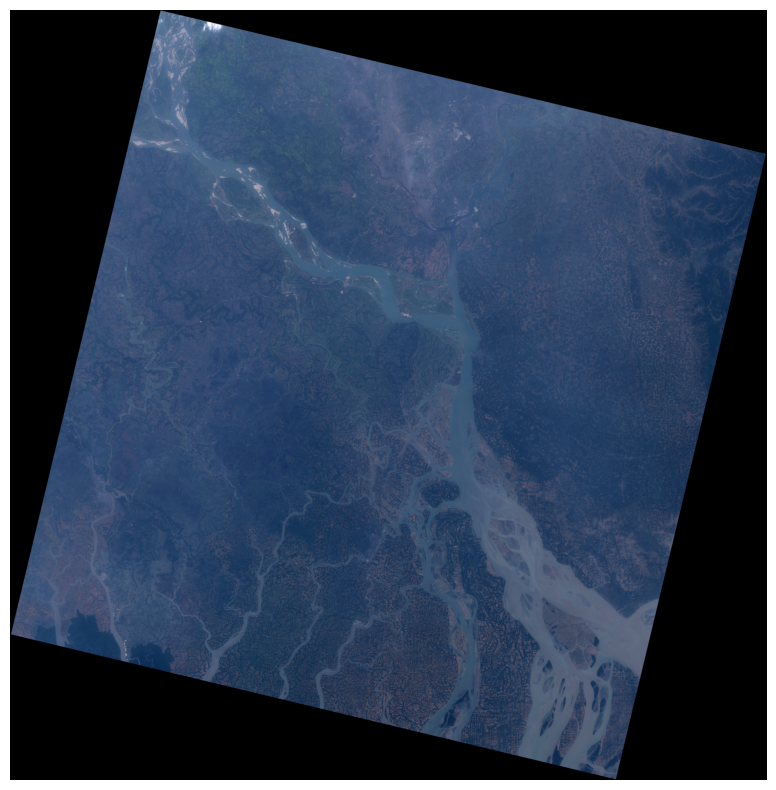

: 

In [33]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt 

# Load Blue (B2), Green (B3) and Red (B4) bands
B2 = tiff.imread('./data/{}/{}_B2.TIF'.format(ID, ID))
B3 = tiff.imread('./data/{}/{}_B3.TIF'.format(ID, ID))
B4 = tiff.imread('./data/{}/{}_B4.TIF'.format(ID, ID))

# Stack and scale bands
RGB = np.dstack((B4, B3, B2))
RGB = np.clip(RGB * 0.0000275-0.2, 0, 1)

# Clip to enhance contrast
RGB = np.clip(RGB, 0, 0.2)/0.2

# Display RGB image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(RGB)
ax.set_axis_off()


In [ ]:
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

